In [ ]:
path="/content/drive/MyDrive/Dataset/spoon"

In [2]:
import cv2
import os
import glob
import sklearn 
import pandas as pd
import numpy as np
from skimage.feature import hog
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix

In [ ]:
#here we use r which do not need to put forward or backward slash
#here the purpose of astarik * is that to access multiple folders inside using glob function
folders = glob.glob(r"/content/drive/MyDrive/Dataset/train/spoon")
spoon_image = []


for folder in folders:
    
    print(folder) 
    for img in glob.glob(folder+r"/*.jpg"):
        images= cv2.imread(img)
        resized = cv2.resize(images, (224,224), interpolation = cv2.INTER_AREA)
        #cv2.imshow('IMG', resized)
        spoon_image.append(resized)
      

/content/drive/MyDrive/Dataset/train/spoon


In [ ]:
print(len(spoon_image))

227


In [ ]:
folders = glob.glob(r"/content/drive/MyDrive/Dataset/train/knife")
knife_image = []


for folder in folders:
    
    print(folder) 
    for img in glob.glob(folder+r"/*.jpg"):
        images= cv2.imread(img)
        resized = cv2.resize(images, (224,224), interpolation = cv2.INTER_AREA)
        #cv2.imshow('IMG', resized)
        knife_image.append(resized)

/content/drive/MyDrive/Dataset/train/knife


In [ ]:
print(len(knife_image))

223


In [ ]:
folders = glob.glob(r"/content/drive/MyDrive/Dataset/train/glass")
glass_image = []


for folder in folders:
    
    print(folder) 
    for img in glob.glob(folder+r"/*.jpg"):
        images= cv2.imread(img)
        resized = cv2.resize(images, (224,224), interpolation = cv2.INTER_AREA)
        #cv2.imshow('IMG', resized)
        glass_image.append(resized)

/content/drive/MyDrive/Dataset/train/glass


In [ ]:
print(len(glass_image))

132


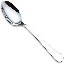

-1

In [ ]:
from google.colab.patches import cv2_imshow
imgg=cv2.imread(r"/content/drive/MyDrive/Dataset/train/spoon/1 (100).jpg")
imgg=cv2.resize(imgg, (64,64))
cv2_imshow(imgg)
cv2.waitKey(0)

In [ ]:
spoon_image=np.array(spoon_image)
knife_image=np.array(knife_image)
glass_image=np.array(glass_image)

In [ ]:
spoon_data=[]
for img in glob.glob(r"/content/drive/MyDrive/Dataset/train/spoon/*.jpg"):
  image= cv2.imread(img)
  image=np.array(image)
  resized = cv2.resize(image, (128,64))
  fd= hog(resized)
  plt.axis("off")
  spoon_data.append(fd)



In [34]:
print(fd.shape)


(6804,)


In [5]:
knife_data=[]
for img in glob.glob(r"/content/drive/MyDrive/Dataset/train/knife/*.jpg"):
  image= cv2.imread(img)
  image=np.array(image)
  resized = cv2.resize(image, (128,64))
  fd= hog(resized)
  knife_data.append(fd)

In [6]:
training_data=spoon_data+knife_data

In [7]:
print(len(training_data))

450


In [8]:
glass_data=[]
for img in glob.glob(r"/content/drive/MyDrive/Dataset/train/glass/*.jpg"):
  image= cv2.imread(img)
  image=np.array(image)
  resized = cv2.resize(image, (128,64))
  fd = hog(resized)
  glass_data.append(fd)

In [9]:
training_data=training_data+glass_data

In [10]:
print(len(training_data))

582


In [11]:

training_label=[]
for i in range(len(training_data)):
  if i<227:
    training_label.append("spoon")
  elif i>=227 and i<450:
    training_label.append("knife")
  else:
    training_label.append("glass")


In [12]:
print(len(training_label))

582


In [13]:
labelencoder = LabelEncoder()
Y=labelencoder.fit_transform(training_label)

In [14]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear')
model2=SVC(kernel='poly')

In [15]:
model.fit(training_data,Y)

SVC(kernel='linear')

In [16]:
model2.fit(training_data,Y)

SVC(kernel='poly')

now loading test dataset

In [17]:
test_spoon=[]
for img in glob.glob(r"/content/drive/MyDrive/Dataset/test/spoon/*.jpg"):
  image= cv2.imread(img)
  image=np.array(image)
  resized = cv2.resize(image, (128,64))
  fd = hog(resized)
  test_spoon.append(fd)

In [18]:
print(len(test_spoon))

15


In [19]:
test_knife=[]
for img in glob.glob(r"/content/drive/MyDrive/Dataset/test/knife/*.jpg"):
  image= cv2.imread(img)
  image=np.array(image)
  resized = cv2.resize(image, (128,64))
  fd = hog(resized)
  test_knife.append(fd)

In [20]:
print(len(test_knife))

15


In [21]:
test_glass=[]
for img in glob.glob(r"/content/drive/MyDrive/Dataset/test/glass/*.jpg"):
  image= cv2.imread(img)
  image=np.array(image)
  resized = cv2.resize(image, (128,64))
  fd = hog(resized)
  test_glass.append(fd)

In [22]:
print(len(test_glass))

10


In [23]:
test_data=test_spoon+test_knife+test_glass
print(len(test_data))

40


In [24]:
test_label=[]
for i in range(len(test_data)):
  if i<15:
    test_label.append("spoon")
  elif i>=15 and i<30:
    test_label.append("knife")
  else:
    test_label.append("glass")


In [25]:
test_label=labelencoder.fit_transform(test_label)

In [26]:
 prediction1 =model.predict(test_data)

In [27]:
 prediction2 =model2.predict(test_data)

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
print("accuracy of the linear kernal",accuracy_score(test_label,prediction1))
print("accuracy of the ploy  kernal",accuracy_score(test_label,prediction2))

accuracy of the linear kernal 0.85
accuracy of the ploy  kernal 0.85


In [30]:
cm = confusion_matrix(test_label, prediction1)

In [31]:
cm

array([[10,  0,  0],
       [ 0, 11,  4],
       [ 0,  2, 13]])

In [32]:
cm2 = confusion_matrix(test_label, prediction2)

In [33]:
cm2

array([[10,  0,  0],
       [ 0, 12,  3],
       [ 0,  3, 12]])

In [36]:
from sklearn.metrics import classification_report

In [37]:
classifi_report=classification_report(test_label,prediction1)

In [39]:
classifi_report

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        10\n           1       0.85      0.73      0.79        15\n           2       0.76      0.87      0.81        15\n\n    accuracy                           0.85        40\n   macro avg       0.87      0.87      0.87        40\nweighted avg       0.85      0.85      0.85        40\n'

In [40]:
classifi_report=classification_report(test_label,prediction2)

In [41]:
classifi_report

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        10\n           1       0.80      0.80      0.80        15\n           2       0.80      0.80      0.80        15\n\n    accuracy                           0.85        40\n   macro avg       0.87      0.87      0.87        40\nweighted avg       0.85      0.85      0.85        40\n'